# CS210 - Homework #1: Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset.


Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [2]:
#SCRAPING WAY - 25 POINTS
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from seleniumbase import Driver
import time
import re


def is_numeric(s):
    try:
        float(s)  # You can use int(s) if you want to check for integers only
        return True
    except ValueError:
        return False
    

url = 'https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG'
chrome_options = Options()

driver = Driver(uc=True)
try:
    
    driver.get(url)
    time.sleep(30)
    columns_element = driver.find_elements(By.CSS_SELECTOR,'th[class]')
    columns = []
    for column in columns_element[10:]:
        columns.append(column.text)
        
    songs_html_elements = driver.find_elements(By.CSS_SELECTOR,'tr[data-id-song]')

    rows = []
    for element in songs_html_elements:
        row = []
        td_elements = element.find_elements(By.CSS_SELECTOR, 'td')
        for value in td_elements[1:]:
            value = value.text
            if is_numeric(value):
                value = float(value)
            row.append(value)
        rows.append(row)

    df = pd.DataFrame(columns=columns)
        
    for row in rows:
        df.loc[len(df.index)] = row 
    display(df)
    driver.close()
except Exception as e:
    print(e)
    driver.close()

# Iterate over rows
for index, row in df.iterrows():
    for column, value in row.iteritems():
        if value == '' or value == None :
            df.drop(index, inplace=True)
            break

df.dropna(inplace=True)





*** chromedriver to download = 123.0.6312.86 (Latest Stable) 

https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/123.0.6312.86/mac-x64/chromedriver-mac-x64.zip ...
Download Complete!



,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Happy,Speech,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot
0,Crying Lightning,Arctic Monkeys,70.0,107.0,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50.0,...,67.0,0.0,20.0,-4 db,E Minor,4.0,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,Buzzcut Season,Lorde,69.0,111.0,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73.0,...,25.0,0.0,10.0,-11 db,C♯/D♭ Major,4.0,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,Ode To The Mets,The Strokes,67.0,92.0,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43.0,...,20.0,0.0,10.0,-5 db,C♯/D♭ Minor,4.0,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A
3,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",76.0,110.0,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,78.0,...,52.0,0.0,0.0,-10 db,A#/B♭ Minor,4.0,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A
4,I Know The End,Phoebe Bridgers,0.0,111.0,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,33.0,...,26.0,0.0,20.0,-10 db,C♯/D♭ Major,4.0,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,forever,Charli XCX,51.0,87.0,"art pop, candy pop, metropopolis, pop, uk pop","Pop, Electronic",how i'm feeling now,2020-05-15,04:03,58.0,...,46.0,10.0,10.0,-3 db,C♯/D♭ Minor,4.0,2023-10-26,5GsJIVCBFjhCcUwJaTW2sB,Atlantic Records UK,12A
322,Silk Chiffon,"MUNA,Phoebe Bridgers",65.0,97.0,"indie pop, indie poptimism, la pop, metropopol...","Pop, Electronic",MUNA,2022-06-24,03:26,62.0,...,44.0,0.0,10.0,-6 db,G#/A♭ Major,4.0,2023-10-26,5ECxiK4Vigo1yRRmAoZc1f,Dead Oceans,4B
323,So Hot You're Hurting My Feelings,Caroline Polachek,66.0,112.0,"art pop, escape room, indie pop, indietronica",Pop,Pang,2019-10-18,03:03,80.0,...,85.0,0.0,10.0,-5 db,F#/G♭ Major,4.0,2023-10-26,5B6Kjha6RRIMWGN7zGsAaT,Perpetual Novice,2B
324,First Love/Late Spring,Mitski,79.0,100.0,"brooklyn indie, pov: indie","Rock, Pop",Bury Me At Makeout Creek,2014-11-11,04:38,45.0,...,10.0,0.0,20.0,-8 db,C Major,4.0,2023-10-26,3sslYZcFKtUvIEWN9lADgr,Dead Oceans,8B


/var/folders/dc/vk_3kydx5qn4bqs7fbr2841h0000gn/T/ipykernel_96322/2934416453.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in row.iteritems():
/var/folders/dc/vk_3kydx5qn4bqs7fbr2841h0000gn/T/ipykernel_96322/2934416453.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in row.iteritems():
/var/folders/dc/vk_3kydx5qn4bqs7fbr2841h0000gn/T/ipykernel_96322/2934416453.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in row.iteritems():
/var/folders/dc/vk_3kydx5qn4bqs7fbr2841h0000gn/T/ipykernel_96322/2934416453.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, value in row.iteritems():
/var/folders/dc/vk_3kydx5qn4bqs7fbr2841h0000gn/T/ipykernel_96322/2934416453.py:60: FutureWarning: iteritems 

In [3]:
#READ THE DATA DIRECTLY - 0 PTS

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [4]:
#2pts - show the first 3 rows
display(df.loc[0:2,:])

,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,Dance,...,Happy,Speech,Live,Loud,Key,Time Signature,Added At,Spotify Track Id,Album Label,Camelot
0,Crying Lightning,Arctic Monkeys,70.0,107.0,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,50.0,...,67.0,0.0,20.0,-4 db,E Minor,4.0,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,Buzzcut Season,Lorde,69.0,111.0,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,73.0,...,25.0,0.0,10.0,-11 db,C♯/D♭ Major,4.0,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,Ode To The Mets,The Strokes,67.0,92.0,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,43.0,...,20.0,0.0,10.0,-5 db,C♯/D♭ Minor,4.0,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A


In [5]:
#1pts - show the info of dataframe
print(df.info)

<bound method DataFrame.info of                                          Song                        Artist  \
0                            Crying Lightning                Arctic Monkeys   
1                              Buzzcut Season                         Lorde   
2                             Ode To The Mets                   The Strokes   
3    Instant Crush (feat. Julian Casablancas)  Daft Punk,Julian Casablancas   
4                              I Know The End               Phoebe Bridgers   
..                                        ...                           ...   
321                                   forever                    Charli XCX   
322                              Silk Chiffon          MUNA,Phoebe Bridgers   
323         So Hot You're Hurting My Feelings             Caroline Polachek   
324                    First Love/Late Spring                        Mitski   
325                                      Ribs                         Lorde   

     Popularity    

In [6]:
#2pts - give the statistical summary of numerical columns,
for column in df.columns:
    if is_numeric(df[column].iloc[0]):
        print(df[column].describe())
        print('-------------------------------')
        print()

count    322.000000
mean      46.400621
std       23.027771
min        0.000000
25%       35.000000
50%       50.000000
75%       62.000000
max       88.000000
Name: Popularity, dtype: float64
-------------------------------

count    322.000000
mean     123.006211
std       25.146548
min       66.000000
25%      106.000000
50%      123.000000
75%      138.000000
max      200.000000
Name: BPM, dtype: float64
-------------------------------

count    322.000000
mean      54.881988
std       14.940121
min       11.000000
25%       45.000000
50%       55.000000
75%       66.000000
max       89.000000
Name: Dance, dtype: float64
-------------------------------

count    322.000000
mean      60.493789
std       20.250648
min       10.000000
25%       45.000000
50%       61.000000
75%       77.000000
max       98.000000
Name: Energy, dtype: float64
-------------------------------

count    322.000000
mean      28.254658
std       29.533292
min        0.000000
25%        2.000000
50%       17

Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [7]:
#5pts
genre_count = {}
for genre in df['Genres']:
    if re.search(r',', genre):
        multi_genre = genre.split(', ')
        for sub_genre in multi_genre:
            if sub_genre in genre_count.keys():
                genre_count[sub_genre] = genre_count[sub_genre] + 1
            else:
                genre_count[sub_genre] = 1
    else:
        if genre in genre_count.keys():
            genre_count[genre] = genre_count[genre] + 1
        else:
            genre_count[genre] = 1

sorted_keys = sorted(genre_count, key=lambda k: genre_count[k])

for genre in reversed(sorted_keys[-10:]):
    print(genre + ': ' + str(genre_count[genre]))

indie rock: 110
modern rock: 104
art pop: 80
rock: 74
indie pop: 63
chamber pop: 52
permanent wave: 48
pov: indie: 41
indietronica: 38
garage rock: 37


Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [8]:
#6pts
top_genres = []

# Get the genres that appear more than 10 times
for genre in genre_count.keys():
    if genre_count[genre] > 10:
        top_genres.append(genre)


# Get the avg. popularity of top genres
pop_index = {}
for genre in top_genres:
    total_score = 0
    for i in range(len(df.index)):
        try:
            arr =  df['Genres'][i].split(', ')
            if genre in arr:
                total_score =  total_score + df.iloc[i,2]
        except:
            pass
    
    avg_pop = total_score/genre_count[genre]
    pop_index[genre] = avg_pop

sorted_pops = sorted(pop_index, key=lambda k: pop_index[k])

print(pop_index)

for genre in reversed(sorted_pops[-5:]):
    print(genre + ': ' + str(pop_index[genre]))




{'garage rock': 48.945945945945944, 'modern rock': 45.52884615384615, 'permanent wave': 53.708333333333336, 'rock': 45.4054054054054, 'sheffield indie': 49.903225806451616, 'art pop': 47.4625, 'metropopolis': 37.46666666666667, 'nz pop': 36.083333333333336, 'pop': 49.05882352941177, 'alternative rock': 40.32258064516129, 'indie rock': 46.71818181818182, 'indie pop': 42.6031746031746, 'la indie': 28.53846153846154, 'pov: indie': 34.36585365853659, 'indietronica': 40.60526315789474, 'modern alternative rock': 47.3448275862069, 'baroque pop': 46.0, 'chamber pop': 48.48076923076923, 'countrygaze': 46.588235294117645, 'small room': 52.526315789473685, 'dream pop': 50.25, 'brooklyn indie': 45.8, 'uk alternative pop': 45.5, 'crank wave': 48.43478260869565, 'uk post-punk revival': 48.5, 'bubblegrunge': 43.5}
permanent wave: 53.708333333333336
small room: 52.526315789473685
dream pop: 50.25
sheffield indie: 49.903225806451616
pop: 49.05882352941177


Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [9]:
#5pts
pop_percentile_75 = df['Popularity'].quantile(0.75)
pop_percentile_25 = df['Popularity'].quantile(0.25)

for index, row in df.iterrows():
    popularity = row['Popularity']
    bpm = row['BPM']
    if popularity > pop_percentile_75:
        df.at[index,'Popularity_Category'] = 'High'
    elif popularity <= 75.0 and popularity >= 25:
         df.at[index,'Popularity_Category'] = 'Medium'
    else:
         df.at[index,'Popularity_Category'] = 'Low'

    if bpm < 100:
        df.at[index,'BPM_Category'] = 'Slow'
    elif bpm >= 100 and bpm <= 130:
        df.at[index,'BPM_Category'] = 'Medium'
    else :
        df.at[index,'BPM_Category'] = 'Fast'


display(df[['Song','Popularity_Category','BPM_Category']])

,Song,Popularity_Category,BPM_Category
0,Crying Lightning,High,Medium
1,Buzzcut Season,High,Medium
2,Ode To The Mets,High,Slow
3,Instant Crush (feat. Julian Casablancas),High,Medium
4,I Know The End,Low,Medium
...,...,...,...
321,forever,Medium,Slow
322,Silk Chiffon,High,Slow
323,So Hot You're Hurting My Feelings,High,Medium
324,First Love/Late Spring,High,Medium


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [10]:
#3pts
# Filter for the specific song by Arctic Monkeys
filtered_song = df.loc[(df['Song'] == 'Crying Lightning') & (df['Artist'] == 'Arctic Monkeys')]

# Display the filtered song
print(filtered_song)

               Song          Artist  Popularity    BPM  \
0  Crying Lightning  Arctic Monkeys        70.0  107.0   

                                              Genres Parent Genres   Album  \
0  garage rock, modern rock, permanent wave, rock...          Rock  Humbug   

   Album Date   Time  Dance  ...  Live   Loud      Key  Time Signature  \
0  2009-08-20  03:44   50.0  ...  20.0  -4 db  E Minor             4.0   

     Added At        Spotify Track Id          Album Label Camelot  \
0  2023-10-11  6wVWJl64yoTzU27EI8ep20  Domino Recording Co      9A   

   Popularity_Category BPM_Category  
0                 High       Medium  

[1 rows x 25 columns]


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [11]:
#6pts

import pandas as pd

# Assuming you have an existing DataFrame named df
# ... (previous code)

db_values = []
for index, row in df.iterrows():
    db_value_string = row['Loud'][:-3]
    
    # Check if the value can be converted to float
    try:
        db_value = float(db_value_string)
    except ValueError:
        # Handle cases where conversion is not possible
        db_value = None
    
    db_values.append(db_value)

# Add the new 'Loud_Float' column to the DataFrame
df['Loud_Float'] = db_values

# Drop rows with 'Loud_Float' as None (couldn't convert to float)
df = df.dropna(subset=['Loud_Float'])

# Calculate the 75th percentile based on the new 'Loud_Float' column
percentile_75 = df['Loud_Float'].quantile(0.75)

# Filter high popularity and fast BPM songs with Loud values above the 75th percentile
high_and_fast_loud_songs = df[(df['Popularity_Category'] == 'High') & (df['BPM_Category'] == 'Fast') & (df['Loud_Float'] >= percentile_75)]

max_album, max_occur = '', 0
value_counts = df['Album'].value_counts()
for index, row in high_and_fast_loud_songs.iterrows():
    occur = value_counts[row['Album']]
    if occur > max_occur :
        max_occur = occur
        max_album = row['Album']

print(max_album)

Favourite Worst Nightmare


Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [12]:
#5pts
popularity_threshold = df['Popularity'].quantile(0.9)


top_10_percent_rows = df[df['Popularity'] >= popularity_threshold]

most_common_camelot = top_10_percent_rows['Camelot'].mode()[0]

print(most_common_camelot)


10B


## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

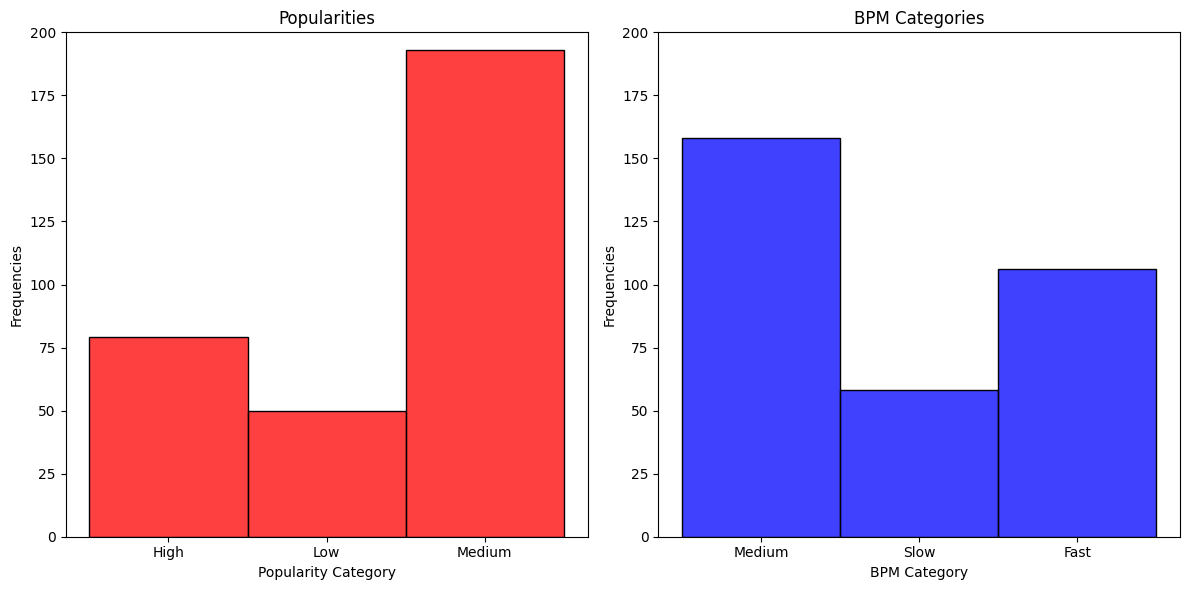

In [13]:
#2pts
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have an existing DataFrame named df with columns 'Popularity_Category' and 'BPM_Category'

# Create a subplot matrix
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create a histogram for 'Popularity_Category'
sns.histplot(df['Popularity_Category'], bins=30, color='red', ax=axes[0])

# Set title and labels for the first subplot
axes[0].set_title('Popularities')
axes[0].set_ylabel('Frequencies')
axes[0].set_xlabel('Popularity Category')
axes[0].set_ylim(0, 200)

# Create a histogram for 'BPM_Category'
sns.histplot(df['BPM_Category'], bins=30, color='blue', ax=axes[1])

# Set title and labels for the second subplot
axes[1].set_title('BPM Categories')
axes[1].set_ylabel('Frequencies')
axes[1].set_xlabel('BPM Category')
axes[1].set_ylim(0, 200)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

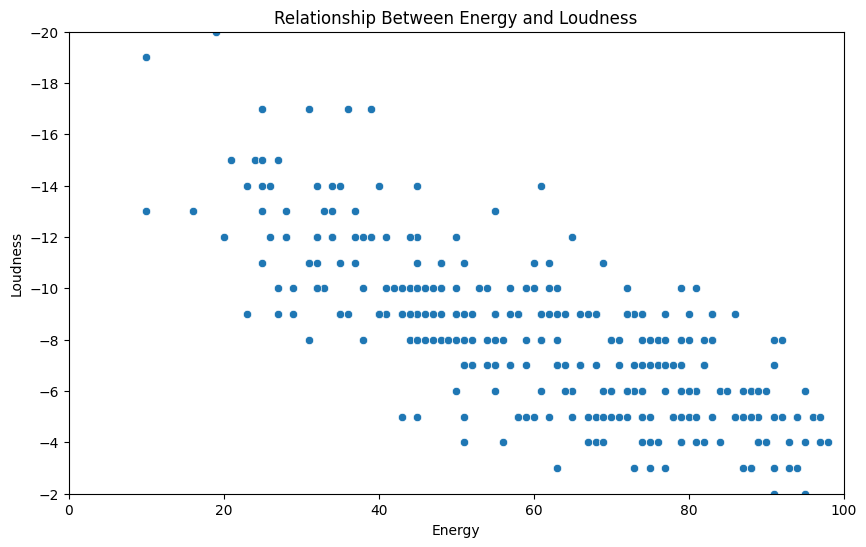

In [14]:
#3pts
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Energy', y='Loud_Float', data=df)

# Set title and labels
plt.title('Relationship Between Energy and Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')

# Set axis limits
plt.xlim(0, 100)
plt.ylim(-2, -20)

# Show the plot
plt.show()

Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


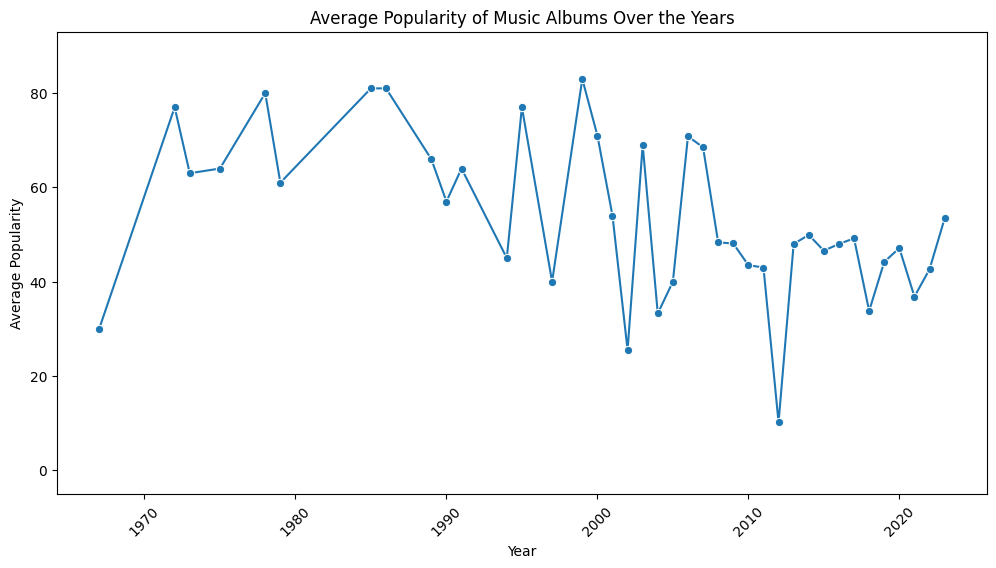

In [15]:
#6pts
# Convert 'Album Date' to datetime
df['Album Date'] = pd.to_datetime(df['Album Date'], errors='coerce')


df['Year'] = df['Album Date'].dt.year

#Calculate the average popularity for each year
average_popularity_by_year = df.groupby('Year')['Popularity'].mean().reset_index()

# Create a line graph with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Popularity', data=average_popularity_by_year, marker='o')

# Set title and labels
plt.title('Average Popularity of Music Albums Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')

# Set y-limits
popularity_min = df['Popularity'].min() - 5
popularity_max = df['Popularity'].max() + 5
plt.ylim(popularity_min, popularity_max)

# Rotate x tick values by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

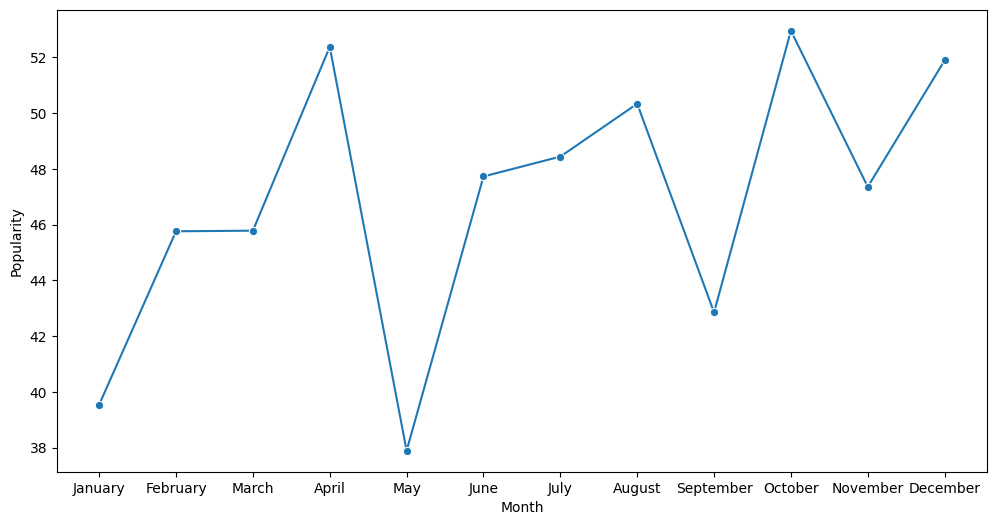

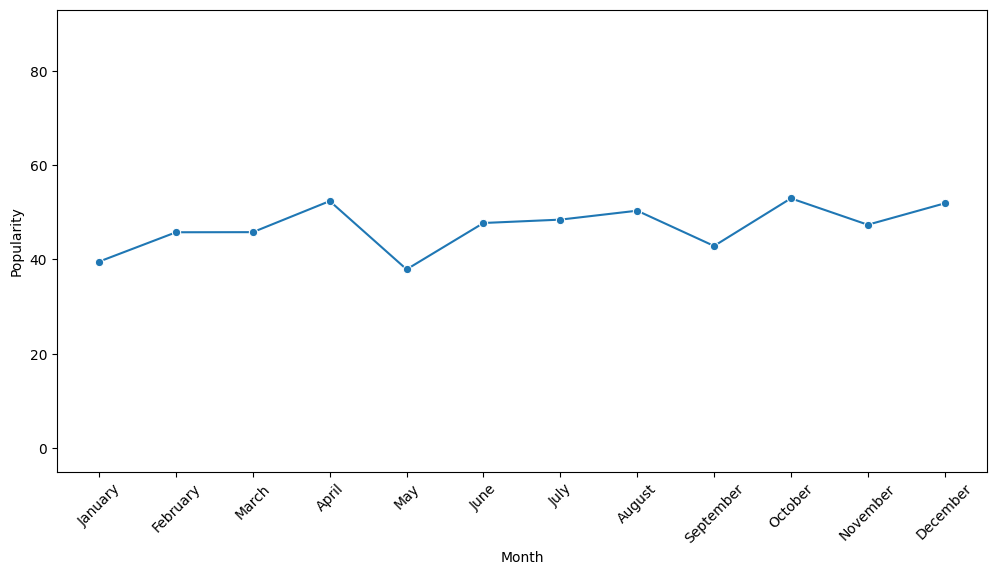

In [16]:
#7pts
df['Month'] = df['Album Date'].dt.month_name()

# Order the months
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Month'] = pd.Categorical(df['Month'], categories=custom_order, ordered=True)

# Calculate the average popularity for each month
average_popularity_by_month = df.groupby('Month')['Popularity'].mean().reset_index()

# Create a line graph with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Popularity', data=average_popularity_by_month, marker='o')

# Create a line graph with markers
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Popularity', data=average_popularity_by_month, marker='o')

# Set y-limits
popularity_min = df['Popularity'].min() - 5
popularity_max = df['Popularity'].max() + 5
plt.ylim(popularity_min, popularity_max)

# Rotate x tick values by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


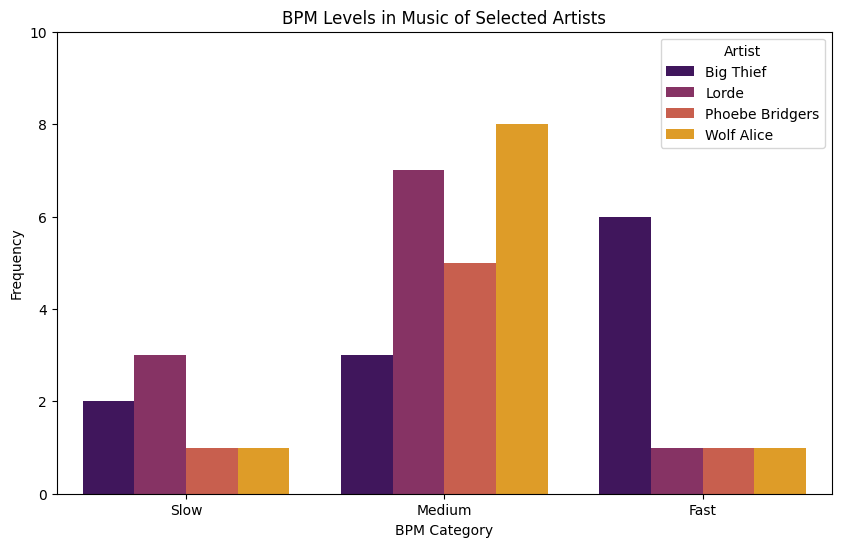

In [17]:
#7pts
# Filter data for the selected artists
selected_artists = ['Lorde','Big Thief','Phoebe Bridgers','Wolf Alice']
df_selected = df[df['Artist'].isin(selected_artists)]

df_selected = df_selected.sort_values(by='Artist')
# Set the order of BPM categories
bpm_order = ['Slow', 'Medium', 'Fast']

# Create a countplot with different colors for each artist
plt.figure(figsize=(10, 6))
sns.countplot(x='BPM_Category', hue='Artist', data=df_selected, order=bpm_order, palette='inferno')

# Set title and labels
plt.title('BPM Levels in Music of Selected Artists')
plt.xlabel('BPM Category')
plt.ylabel('Frequency')

# Set y-axis limits for better clarity
plt.ylim(0, 10)

# Show the plot
plt.show()

We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


<Figure size 1200x800 with 0 Axes>

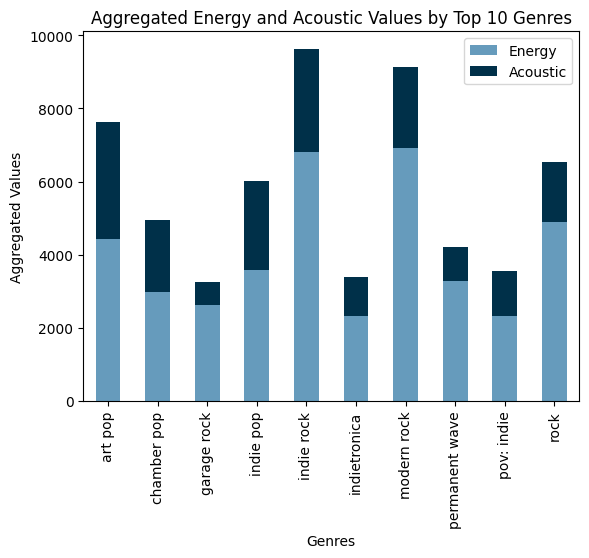

In [18]:
#7pts
df_genres_split = df['Genres'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Genre')
df_split = df.join(df_genres_split)

# Get the top 10 most common genres
top_genres = df_split['Genre'].value_counts().nlargest(10).index

# Filter data for the top 10 genres
df_top_genres = df_split[df_split['Genre'].isin(top_genres)]

# Aggregate Energy and Acoustic values for each genre
agg_values = df_top_genres.groupby('Genre')[['Energy', 'Acoustic']].sum()

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
agg_values.plot(kind='bar', stacked=True, color=['#669bbc', '#003049'])

# Set title and labels
plt.title('Aggregated Energy and Acoustic Values by Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Aggregated Values')

# Show the plot
plt.show()

Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

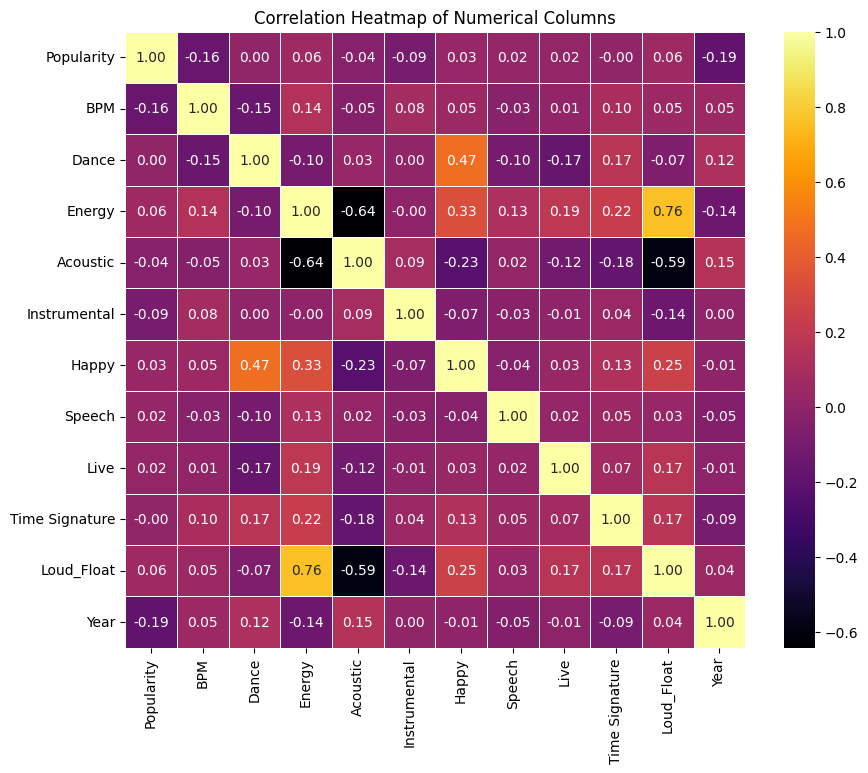

In [19]:
#4pts
# Select numerical columns only
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt=".2f", linewidths=.5)

# Set title
plt.title('Correlation Heatmap of Numerical Columns')

# Show the plot
plt.show()

And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [20]:
#4pts
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

driver = webdriver.Chrome()

url = 'https://chat.openai.com/share/40ee73d8-b4d4-40bd-8cbc-c4a8c52157e6'
driver.get(url)


page_source = driver.page_source

driver.quit()

soup = BeautifulSoup(page_source, 'html.parser')



Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

